Import required libraries

In [58]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import neighbors

Generate data using np.random module 

In [59]:
np.random.seed(0)
X = np.sort(5 * np.random.rand(40, 1), axis=0)
T = np.linspace(0, 5, 500)[:, np.newaxis]
y = np.sin(X).ravel()

Check the generated data by plotting. X is randomly generated data and y is its sin values and hence it will be a smooth curve.

In [61]:
plt.plot?

<IPython.core.display.Javascript object>


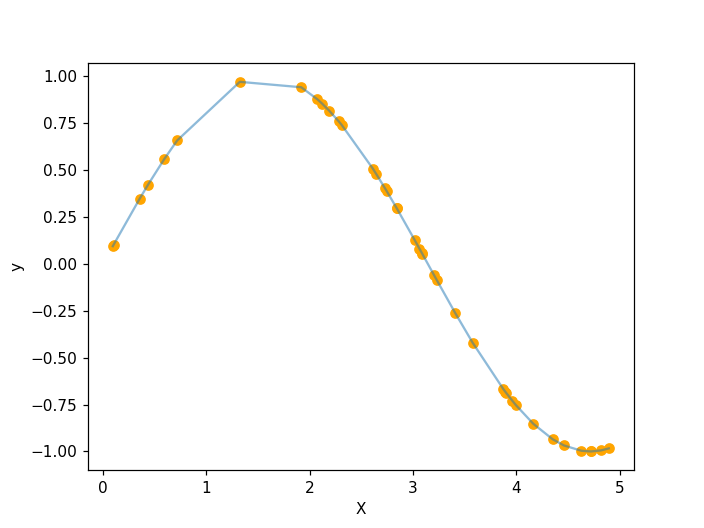

In [62]:
plt.plot(X, y, alpha=0.5)
plt.xlabel('X')
plt.ylabel('y')
plt.scatter(X, y, marker='o', color='orange')

Let's add some noise to y

In [63]:
y[::5] += 1 * (0.5 - np.random.rand(8))

Plot again

<IPython.core.display.Javascript object>


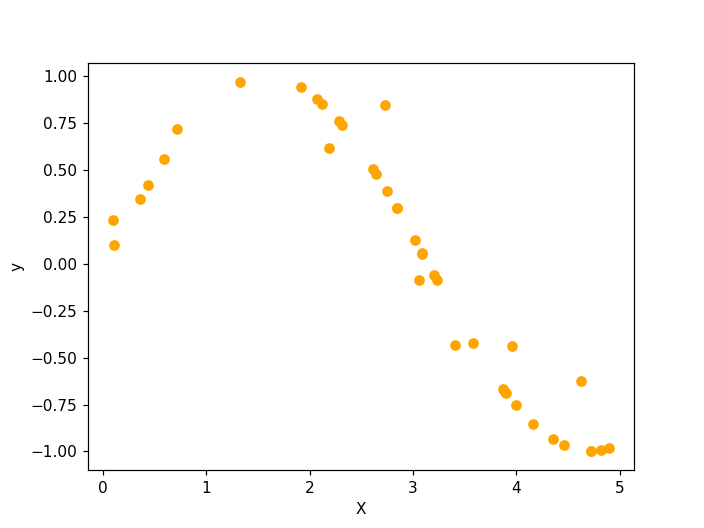

Text(0, 0.5, 'y')

In [64]:
#plt.plot(X, y, alpha=0.5)
plt.scatter(X, y, marker='o', color='orange')
plt.xlabel('X')
plt.ylabel('y')

Let's explore KNN linear regression using this data set.

<IPython.core.display.Javascript object>


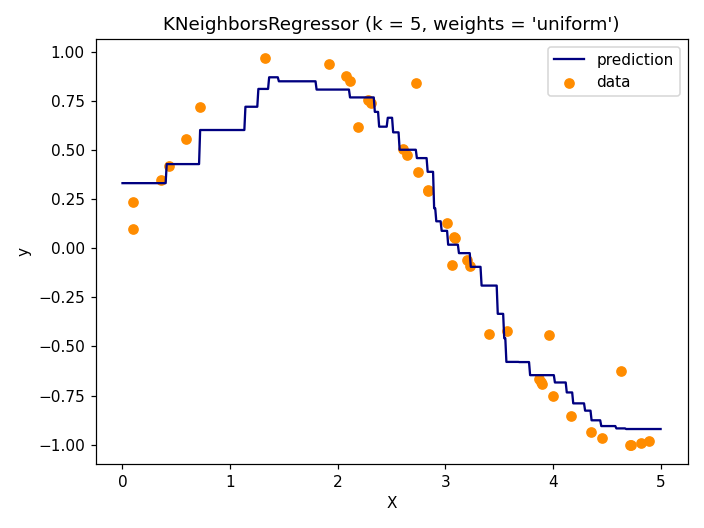

In [65]:
k = 5
knn = neighbors.KNeighborsRegressor(k, weights='uniform')
y_ = knn.fit(X, y).predict(T)

plt.subplot(1, 1, 1)
plt.scatter(X, y, color='darkorange', label='data')
plt.plot(T, y_, color='navy', label='prediction')
plt.axis('tight')
plt.legend()
plt.title("KNeighborsRegressor (k = %i, weights = 'uniform')" % (k))
plt.xlabel('X')
plt.ylabel('y')
plt.tight_layout()
plt.show()

Insted of weights='uniform', try weights='distance'

<IPython.core.display.Javascript object>


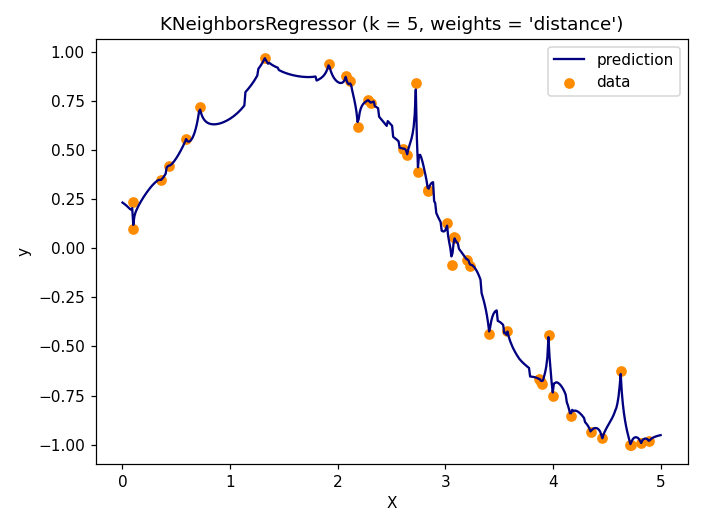

In [66]:
knn = neighbors.KNeighborsRegressor(k, weights='distance')
y_ = knn.fit(X, y).predict(T)

plt.subplot(1, 1, 1)
plt.scatter(X, y, color='darkorange', label='data')
plt.plot(T, y_, color='navy', label='prediction')
plt.axis('tight')
plt.legend()
plt.title("KNeighborsRegressor (k = %i, weights = 'distance')" % (k))
plt.xlabel('X')
plt.ylabel('y')
plt.tight_layout()
plt.show()

So, using weights='distance' make the prediction curve smoother. <br>
Let's see how the curve changes as a function of k.

<IPython.core.display.Javascript object>


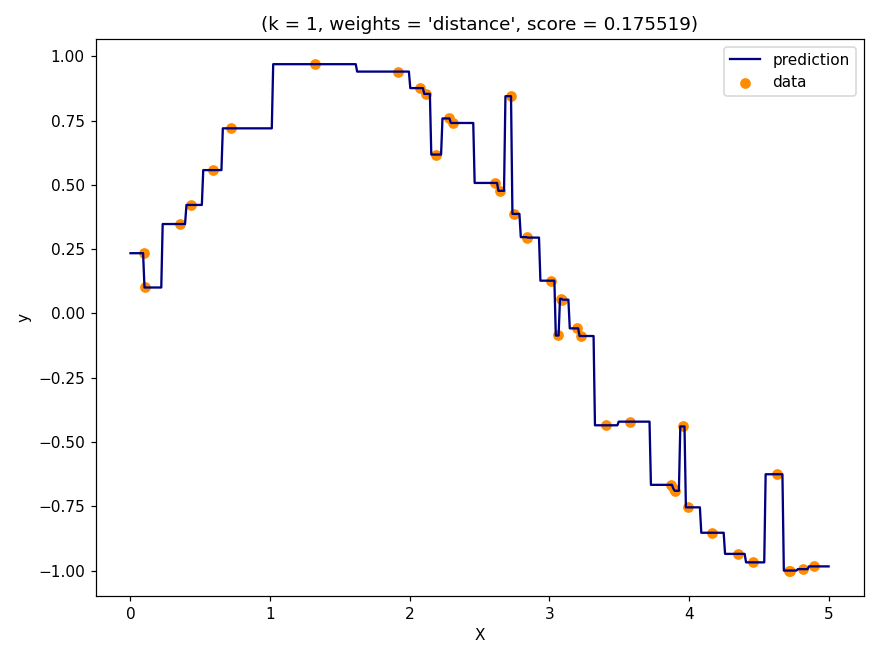

<IPython.core.display.Javascript object>


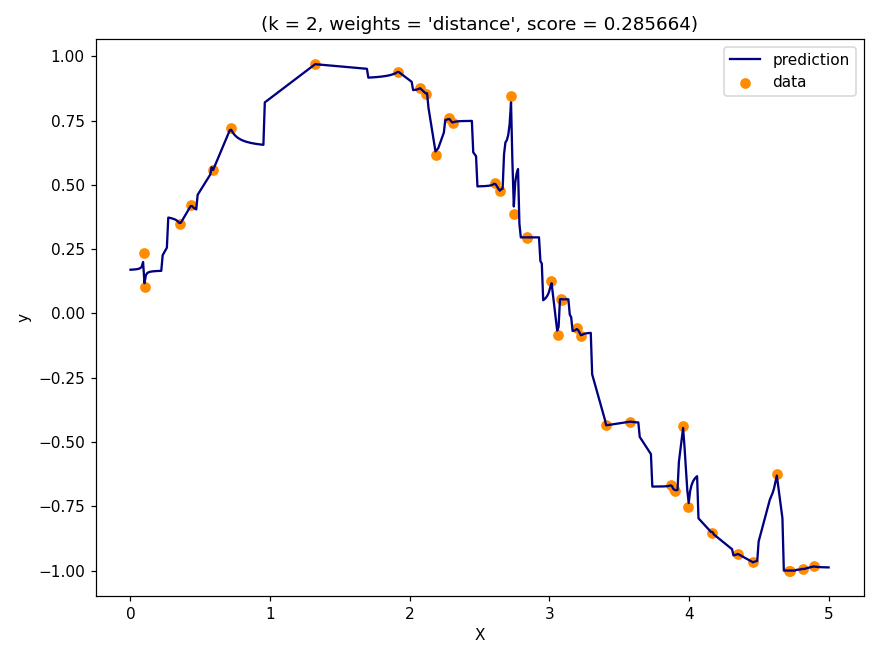

<IPython.core.display.Javascript object>


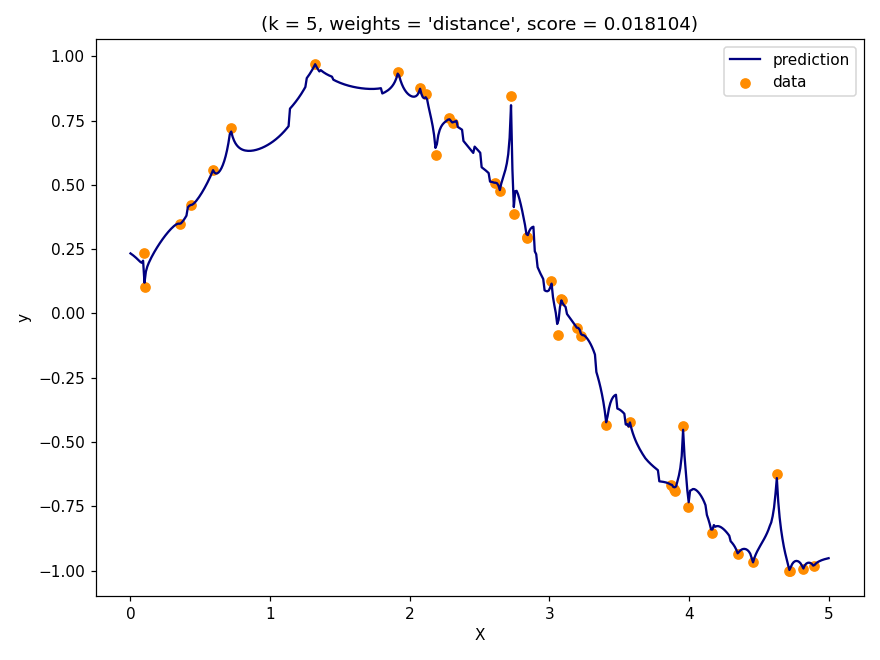

<IPython.core.display.Javascript object>


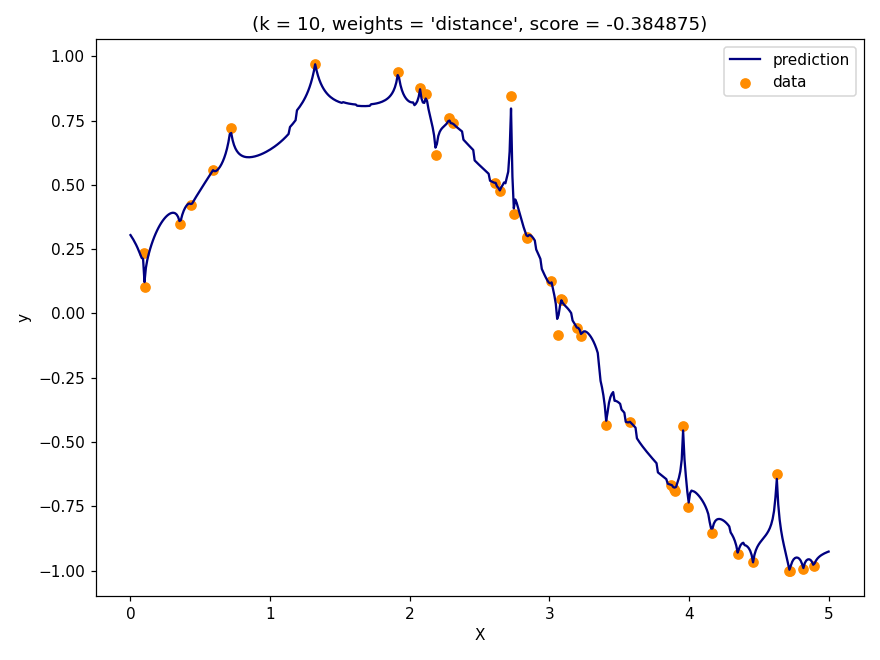

<IPython.core.display.Javascript object>


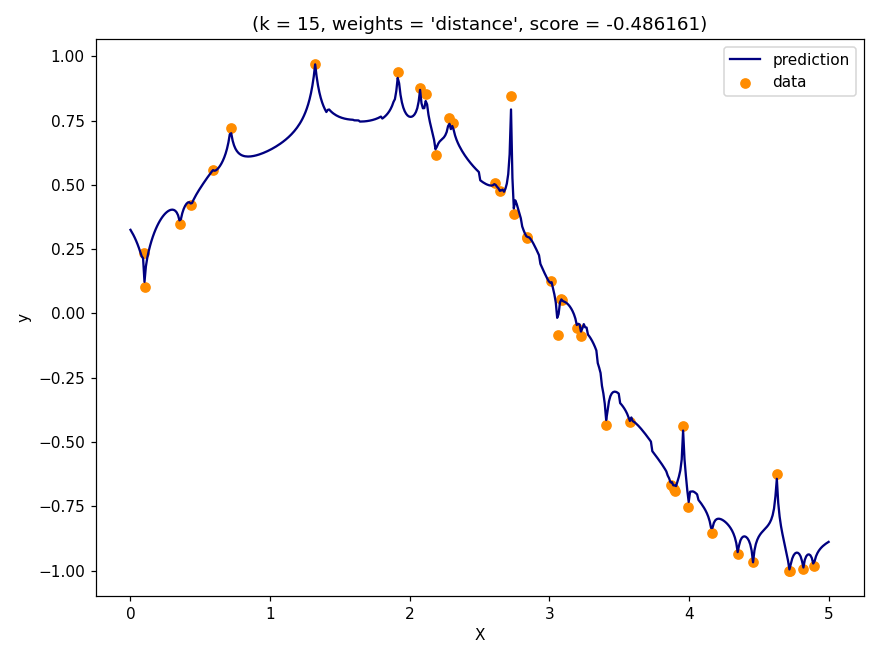

<IPython.core.display.Javascript object>

In [67]:
np.random.seed(10)
X_test = np.sort(5 * np.random.rand(40, 1), axis=0)
y_test = np.sin(X).ravel()
for k in [1, 2, 5, 10, 15, 20]:
    knn = neighbors.KNeighborsRegressor(k, weights='distance')
    y_ = knn.fit(X, y).predict(T)
    score = knn.score(y_test.reshape(-1, 1), knn.predict(X_test).reshape(-1, 1))
    plt.figure(figsize=(8, 6))
    plt.scatter(X, y, color='darkorange', label='data')
    plt.plot(T, y_, color='navy', label='prediction')
    plt.axis('tight')
    plt.legend()
    plt.title("(k = %i, weights = 'distance', score = %f)" % (k, score))
    plt.xlabel('X')
    plt.ylabel('y')
    plt.tight_layout()
plt.show()

With k = 5 and weight='distance', the KNN model gives the lowest $R_2$ score, and hence can be treated as the best model. Some models, such as the ones with k > 5, give $R_2$ score a negative value. So these model with higher k value are arbitrarily wrong.

- The $R_2$ score and plot for different KNN model with weights='uniform' can be examined.